In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
mnist_data = fetch_openml('mnist_784')

In [5]:
input_data, y = mnist_data['data'],mnist_data['target']
input_data = input_data / 255
noutput = 10
yone_hot = np.zeros([y.shape[0],noutput])
for i in range(y.shape[0]):
    yone_hot[i,int(y[i])]=1
    
y = yone_hot
m = 60000
m_test = input_data.shape[0]-m
y_train,y_test = y[:m,:].reshape(m,noutput),y[m:,:].reshape(m_test,noutput)
inp_train,inp_test = input_data[:m,:],input_data[m:,:]
np.random.seed(41)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


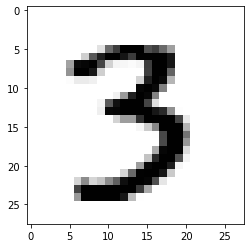

In [7]:
#Random input
import matplotlib
i=10000
plt.imshow(inp_train[i,:].reshape(28,28),cmap=matplotlib.cm.binary)
print(y_train[i,:])

In [8]:
#Activation functions
# Loss functions and derivaties

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return 0.5  * (np.sign(x)+1)

def sig_derivative(z):
    return z * (1-z)

def softmax(y):
    return np.exp(y)/np.sum(np.exp(y),axis=0)

def softmax_derivative(output, ideal_output):
    return output - ideal_output

def crossentropy(y,y_hat):
    L_sum= np.sum(np.multiply(y,np.log(y_hat)))
    m=y.shape[1]
    L=-(1/m)*L_sum
    return L
    

In [16]:
inputdim = inp_train.shape[1]
n_hidden =64
learning_rate = 1
weight_decay = 0.01

W1 = 0.01*np.random.randn(n_hidden,inputdim)
b1=np.zeros((n_hidden,1))

W2 = 0.01*np.random.randn(noutput,n_hidden)
b2=np.zeros((noutput,1))

In [11]:
W1

array([[-0.00270712,  0.00104848,  0.00250528, ...,  0.01940473,
         0.00408059, -0.00157593],
       [-0.0094587 , -0.00304692, -0.00216561, ..., -0.002463  ,
         0.00103486, -0.01369246],
       [-0.00516538, -0.00246943, -0.02201363, ..., -0.00548485,
         0.00683345, -0.00794973],
       ...,
       [ 0.00522935,  0.0086859 ,  0.0037615 , ...,  0.00054191,
         0.0094827 ,  0.00302852],
       [-0.00174237,  0.01827769, -0.02202751, ...,  0.01455797,
        -0.00516132,  0.01337605],
       [-0.00574064, -0.00886741,  0.00234945, ..., -0.00608421,
         0.01248797, -0.00408243]])

In [14]:
W1

array([[ 0.00984146, -0.0082678 , -0.00018354, ...,  0.00228442,
         0.00684704, -0.00128111],
       [ 0.0069603 ,  0.00338981, -0.01094554, ...,  0.00269047,
         0.00178152,  0.01458451],
       [-0.00145382,  0.00380729,  0.02750076, ...,  0.01499663,
         0.00125133,  0.02295837],
       ...,
       [ 0.00907503,  0.00114412, -0.00708429, ..., -0.00579486,
         0.01358129, -0.00703116],
       [ 0.00484726,  0.00319458, -0.00575015, ...,  0.00193891,
        -0.00507101, -0.01412733],
       [-0.01288235,  0.01661891,  0.01119498, ..., -0.01822454,
        -0.00864803, -0.00489328]])

In [15]:
W2

array([[-0.0098428 ,  0.0145968 ,  0.00203959,  0.00189242, -0.00268776,
         0.01272308,  0.00763796,  0.00507826,  0.01341276, -0.02062601,
         0.00668771,  0.00481916,  0.01734884,  0.00095   , -0.00847278,
        -0.01490636, -0.00596288, -0.01051098,  0.00278609, -0.0006953 ,
         0.00769639,  0.007338  , -0.01411843,  0.01144696, -0.00010957,
        -0.00884571, -0.00959475,  0.00130503,  0.0064479 , -0.01742923,
         0.00338448, -0.00850928, -0.02047712, -0.00378379,  0.00797115,
        -0.00402949, -0.00292058, -0.00704962,  0.00876767,  0.01924016,
         0.01399473,  0.00336359,  0.0063337 , -0.00150701, -0.0045013 ,
        -0.00254884,  0.01185375,  0.00303739, -0.01708925,  0.00597216,
        -0.00920421,  0.01632505,  0.00658226, -0.02358358,  0.00161339,
         0.01970893,  0.01012395,  0.0152833 , -0.01282348,  0.00504059,
        -0.01013794, -0.00297225, -0.00485508, -0.00660947],
       [-0.00845685,  0.00518289,  0.0135306 , -0.00124953, -0.

In [17]:
W2

array([[-7.20462606e-03,  1.00393981e-02, -1.71115261e-03,
         1.20323090e-02, -1.54594111e-02,  2.32098835e-03,
        -5.10886074e-03, -1.17650734e-02, -2.29556840e-02,
        -2.57708178e-03, -1.04838085e-02, -2.21289855e-03,
         5.98340656e-03, -1.10459929e-03, -5.33329127e-03,
        -5.48098049e-03,  1.85657960e-03,  1.12220885e-02,
         7.90080004e-03, -8.34544798e-04, -2.27648811e-02,
         1.40265059e-02,  5.71236706e-03, -3.51933933e-02,
        -8.22822929e-03, -3.18490206e-04,  3.00563640e-03,
         9.00275646e-03, -6.83025908e-03, -1.01860361e-02,
        -4.82404146e-03,  1.25109172e-02, -8.96384826e-03,
        -2.92503621e-03,  4.34214088e-03, -5.44878439e-03,
         3.02097538e-03,  1.34608158e-02,  4.07092988e-03,
         2.79392175e-02, -4.44449071e-03, -2.10935461e-03,
         1.38702901e-02, -5.26631400e-03, -1.46182580e-02,
        -4.34642398e-03,  8.70500227e-03,  2.17850664e-02,
         1.04871454e-02,  5.97900953e-03, -2.42244863e-0

Epoch: 0 Cost: 2.30271135042056
Epoch: 10 Cost: 1.320317218828065
Epoch: 20 Cost: 1.5430075970420791
Epoch: 30 Cost: 1.3173885606161404
Epoch: 40 Cost: 0.9506881688837885
Epoch: 50 Cost: 0.9946983930924705
Epoch: 60 Cost: 0.6181547295404722
Epoch: 70 Cost: 0.7894409363316887
Epoch: 80 Cost: 0.437332274472862
Epoch: 90 Cost: 0.9916567587431012


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Training Loss')

<function matplotlib.pyplot.show(*args, **kw)>

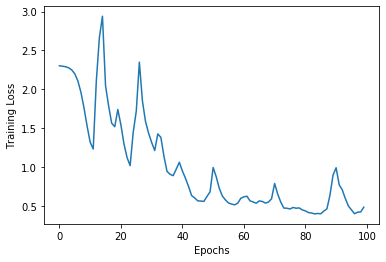

In [18]:
nepochs=100

costplot = np.zeros(nepochs)

for i in range(nepochs):
    Z1= np.matmul(W1,inp_train.T)+b1
    A1= relu(Z1)
    Z2 = np.matmul(W2,A1)+b2
    A2=softmax(Z2)
    
    cost = crossentropy(y_train.T,A2)
    costplot[i]=cost
    
    dZ2=softmax_derivative(A2,y_train.T)
    dW2=(1./m)*np.matmul(dZ2,A1.T)
    db2=(1./m)*np.sum(dZ2,axis=1,keepdims=True)
    
    dA1=np.matmul(W2.T,dZ2)
    dZ1=dA1 * relu_derivative(Z1)
    dW1=(1./m) * np.matmul(dZ1,inp_train)
    db1=(1./m)*np.sum(dZ1,axis=1,keepdims=True)
    
    
    W2 -= learning_rate*dW2+weight_decay*W2
    b2-=learning_rate*db2
    W1-= learning_rate*dW1 + weight_decay*W1
    b1-=learning_rate*db1
    
    if (i%10==0):
        print("Epoch:",i,"Cost:",cost)
plt.plot(costplot)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show


In [19]:
Z1 =np.matmul(W1,inp_test.T)+b1
A1=relu(Z1)
Z2=np.matmul(W2,A1)+b2


predictions = np.argmax(Z2,axis=0)
labels = np.argmax(y_test.T,axis=0)

print(confusion_matrix(predictions,labels))

[[ 958    0    9    8    1   35   16    5    6   13]
 [   0 1103    8    3    3    5    3   17   10    7]
 [   6    4  920   85    6   14   11   45   14    8]
 [   0    0    0  724    0   24    0    0    1    1]
 [   0    0   16    0  917   13   13    7    5   53]
 [   0    0    0   15    0  387    3    0    0    1]
 [   6    2   11    6   11   24  890    0   11    0]
 [   1    2   18   27    2   19    0  929   11   35]
 [   9   24   48  139   15  363   22    8  911   33]
 [   0    0    2    3   27    8    0   17    5  858]]


In [20]:
print(classification_report(predictions,labels))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1051
           1       0.97      0.95      0.96      1159
           2       0.89      0.83      0.86      1113
           3       0.72      0.97      0.82       750
           4       0.93      0.90      0.91      1024
           5       0.43      0.95      0.60       406
           6       0.93      0.93      0.93       961
           7       0.90      0.89      0.90      1044
           8       0.94      0.58      0.72      1572
           9       0.85      0.93      0.89       920

    accuracy                           0.86     10000
   macro avg       0.85      0.88      0.85     10000
weighted avg       0.89      0.86      0.86     10000

